In [5]:
import os
import typing
from sklearn.gaussian_process.kernels import *
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from matplotlib import cm


# Set `EXTENDED_EVALUATION` to `True` in order to visualize your predictions.
EXTENDED_EVALUATION = False
EVALUATION_GRID_POINTS = 300  # Number of grid points used in extended evaluation
EVALUATION_GRID_POINTS_3D = 50  # Number of points displayed in 3D during evaluation


# Cost function constants
COST_W_UNDERPREDICT = 25.0
COST_W_NORMAL = 1.0
COST_W_OVERPREDICT = 10.0

In [6]:
train_features = np.loadtxt("train_x.csv", delimiter=",", skiprows=1)
train_GT = np.loadtxt("train_y.csv", delimiter=",", skiprows=1)
test_features = np.loadtxt("test_x.csv", delimiter=",", skiprows=1)

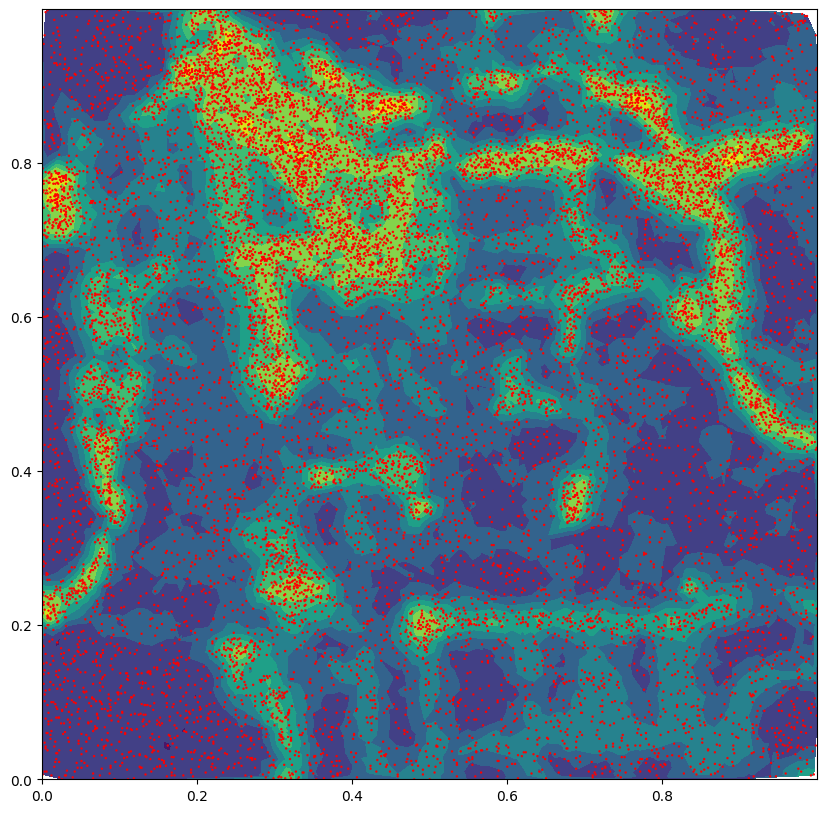

In [7]:
fig1 = plt.figure(figsize=(10,10))
lon_train = train_features[:,0]
lat_train = train_features[:,1]
plt.tricontourf(lon_train, lat_train, train_GT)
plt.scatter(lon_train, lat_train, color='red', alpha=1, s=np.ones_like(train_GT)*0.5)

In [8]:
rows = 5
cols = 5
max_points_per_cell = 100

lon_bound = [min(lon_train),max(lon_train)]
lat_bound = [min(lat_train),max(lat_train)]

res_lon = (lon_bound[1]-lon_bound[0])/cols
res_lat = (lat_bound[1]-lat_bound[0])/rows

In [9]:
for i in range(0, 64, 10):
    print(f"Less than {i}: {100*sum(train_GT<i)/len(train_GT)} %")

Less than 0: 0.11192310224504576 %
Less than 10: 15.399302126538943 %
Less than 20: 31.483310290341695 %
Less than 30: 43.06405951675555 %
Less than 40: 56.363157548225686 %
Less than 50: 74.94239252090328 %
Less than 60: 98.13680953321483 %


In [10]:
from collections import defaultdict
from random import sample


LUT_data = defaultdict(lambda: list())

for idx, val in enumerate(train_GT):
    lon = lon_train[idx]
    lat = lat_train[idx]
    row = lon // res_lon
    col = lat // res_lat
    LUT_data[(row,col)].append((lon, lat, val))

sampled_points = []
for r in range(rows):
    for c in range(cols):
        points = LUT_data[(r,c)] 
        sampled_points.extend(sample(points, k=min(max_points_per_cell, len(points))))

TypeError: 'int' object is not iterable

In [4]:
sampled_points = np.array(sampled_points)
lon_sampled = sampled_points[:,0]
lat_sampled = sampled_points[:,1]
GT_sampled = sampled_points[:,2]
fig = plt.figure(figsize=(10, 10))
plt.tricontourf(lon_sampled, lat_sampled, GT_sampled)
plt.scatter(lon_sampled, lat_sampled, color='red', alpha=1, s=np.ones_like(GT_sampled)*0.5)

NameError: name 'sampled_points' is not defined